### 1. Gaussian Naive Bayes 예 (강의자료 5쪽)

In [7]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

iris = ds.load_iris()
print("데이터의 형태 : ", iris.data.shape)
print("특성 이름 :\n", iris.feature_names)
print("데이터 설명 :\n", iris.DESCR)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnbfit = gnb.fit(X_train, y_train)
y_pred = gnbfit.predict(X_test)

print("테스트 세트에 대한 예측값 : \n{}".format(y_pred))
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도 : {:.2f}".format(gnbfit.score(X_test, y_test)))

데이터의 형태 :  (150, 4)
특성 이름 :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
데이터 설명 :
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (h

### 2. Logistic Regression 예 (강의자료 7쪽)

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#1개의 특징(x)을 가지고 2개의 클래스(y=0,1)를 가지는 데이터 생성
X0, y = make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
#반환값 X0 : [n_samples, n_features]크기의 배열, 독립 변수(특징)
#y : [n_samples] 크기의 배열, 종속 변수
display("X0=", X0)
display("y=", y)

#생성된 데이터로 ligistic regression으로 모델링
model = LogisticRegression().fit(X0, y)

#테스트 데이터 xx는 -3~3 범위 내의 값 100개 생성
xx = np.linspace(-3, 3, 100)

#1차원 xx를 2차원 [n_samples, n_features] 크기의 배열로 변경
XX = xx[:, np.newaxis]#차원 변경, xx, reshape(100, 1)과 동일

#logistic regression으로 생성된 모델을 이용하여
#테스트 xx에 대해 각 클래스(0, 1)의 확률 계산
#prob = 1.0(1+np.exp(-model.coef_[0][0]*xx-model.intercept_[0]))
prob = model.predict_proba(XX)
prob1 = prob[:,1]#class 1(y=1)만 추출
display(prob)
display(prob1)

'X0='

array([[-0.56511345],
       [ 1.81256131],
       [-1.33619806],
       [ 1.74890611],
       [-0.19702637],
       [-0.97174619],
       [ 0.09145142],
       [-0.81781175],
       [ 1.02115611],
       [-0.37608967],
       [-0.63998141],
       [ 1.09331425],
       [-1.04567041],
       [-1.82248917],
       [ 0.66737508],
       [-1.33802467],
       [ 1.03973007],
       [ 1.02861972],
       [ 1.46827084],
       [ 1.20747622],
       [-1.60045596],
       [-0.1215664 ],
       [ 1.12325354],
       [-1.21712319],
       [ 0.6186367 ],
       [ 1.46318811],
       [ 1.68552793],
       [ 0.36681905],
       [ 0.68897352],
       [ 0.15405526],
       [ 1.14288962],
       [-0.08399356],
       [ 1.3275078 ],
       [-2.22397948],
       [-1.15725619],
       [-0.97375549],
       [-1.59369901],
       [-0.827541  ],
       [-0.97605292],
       [ 1.51279225],
       [ 0.4668358 ],
       [ 0.89903364],
       [-0.7953375 ],
       [-0.58656328],
       [-1.70642152],
       [-0

'y='

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[9.99812528e-01, 1.87471872e-04],
       [9.99776527e-01, 2.23472974e-04],
       [9.99733614e-01, 2.66385695e-04],
       [9.99682464e-01, 3.17536177e-04],
       [9.99621495e-01, 3.78504682e-04],
       [9.99548826e-01, 4.51174157e-04],
       [9.99462212e-01, 5.37788007e-04],
       [9.99358981e-01, 6.41018828e-04],
       [9.99235950e-01, 7.64050121e-04],
       [9.99089327e-01, 9.10673397e-04],
       [9.98914596e-01, 1.08540351e-03],
       [9.98706384e-01, 1.29361553e-03],
       [9.98458293e-01, 1.54170704e-03],
       [9.98162710e-01, 1.83729038e-03],
       [9.97810580e-01, 2.18942008e-03],
       [9.97391138e-01, 2.60886153e-03],
       [9.96891592e-01, 3.10840779e-03],
       [9.96296748e-01, 3.70325230e-03],
       [9.95588574e-01, 4.41142626e-03],
       [9.94745690e-01, 5.25431032e-03],
       [9.93742769e-01, 6.25723069e-03],
       [9.92549850e-01, 7.45015048e-03],
       [9.91131533e-01, 8.86846677e-03],
       [9.89446077e-01, 1.05539228e-02],
       [9.874443

array([1.87471872e-04, 2.23472974e-04, 2.66385695e-04, 3.17536177e-04,
       3.78504682e-04, 4.51174157e-04, 5.37788007e-04, 6.41018828e-04,
       7.64050121e-04, 9.10673397e-04, 1.08540351e-03, 1.29361553e-03,
       1.54170704e-03, 1.83729038e-03, 2.18942008e-03, 2.60886153e-03,
       3.10840779e-03, 3.70325230e-03, 4.41142626e-03, 5.25431032e-03,
       6.25723069e-03, 7.45015048e-03, 8.86846677e-03, 1.05539228e-02,
       1.25556426e-02, 1.49312913e-02, 1.77483565e-02, 2.10855365e-02,
       2.50342060e-02, 2.96999042e-02, 3.52037645e-02, 4.16837600e-02,
       4.92955912e-02, 5.82129765e-02, 6.86270390e-02, 8.07444069e-02,
       9.47835830e-02, 1.10969106e-01, 1.29523044e-01, 1.50653492e-01,
       1.74539964e-01, 2.01316020e-01, 2.31050009e-01, 2.63725527e-01,
       2.99223881e-01, 3.37311385e-01, 3.77634429e-01, 4.19724763e-01,
       4.63016248e-01, 5.06872564e-01, 5.50623367e-01, 5.93604716e-01,
       6.35198696e-01, 6.74867307e-01, 7.12176921e-01, 7.46811409e-01,
      

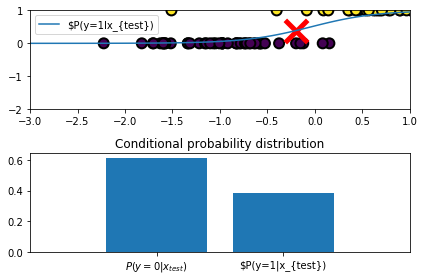

In [19]:
#하나의 테스트 값
x_test = [[-0.2]]

#2행 1열에 두 개의 서브 플롯으로 그래프 그리기
#(1)xx에 대한 그래프
plt.subplot(211)
#테스트 데이터 xx에 대한 class 1(y=1)인 확률 그래프
plt.plot(xx, prob1)
#학습데이터 그래프
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
#하나의 테스트 값에 대한 결과(확률)을 X로 표시
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)

plt.xlim(-3, 1)
plt.ylim(-2, 1, 2)
plt.legend(["$P(y=1lx_{test})"])

#(2)x_test 확률 막대 그래프
plt.subplot(212)
#각 클래스에 대한 x_test의 확률값 막대 그래프
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

### 3. 유방암 분류문제 (강의자료 9쪽)

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("C=1, 훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("C=1, 테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("C=100, 훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("C=100, 테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("C=0.01, 훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("C=0.01, 테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

C=1, 훈련 세트 점수 : 0.953
C=1, 테스트 세트 점수 : 0.958
C=100, 훈련 세트 점수 : 0.972
C=100, 테스트 세트 점수 : 0.965
C=0.01, 훈련 세트 점수 : 0.934
C=0.01, 테스트 세트 점수 : 0.930


c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


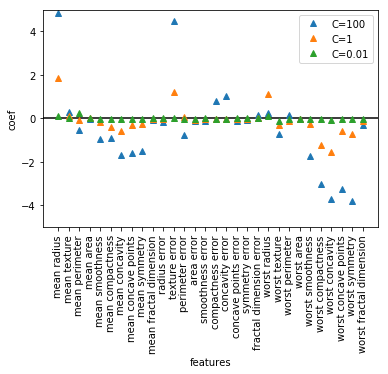

In [22]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, '^', label="C=1")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("features")
plt.ylabel("coef")
plt.legend()

### 4. Decidion boundary (2-class, 3-class) 예 (강의자료 11-12쪽)

c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


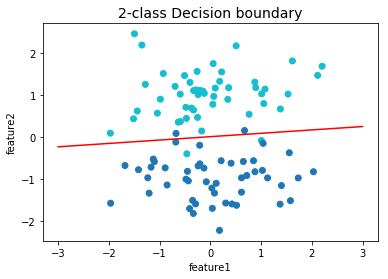

In [24]:
#2-class 분류 알고리즘 데이터 집합
#2차원 데이터 집합
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification

#data 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)

#data plot
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:, 0], X[:,1], c=y, cmap='tab10')
plt.title('2-class Decision boundary', fontsize=14)
plt.xlabel('feature1')
plt.ylabel('feature2')

#modeling
logreg = LogisticRegression().fit(X, y)

#Dicision boundary plot
line = np.linspace(-3, 3)
colors = ['red']
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wlgh3\venv\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


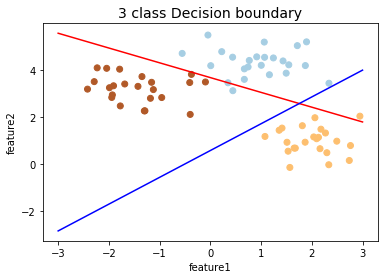

In [25]:
#3-class 분류 알고리즘 데이터집합
#2차원 데이터 집합

#data 생성
X, y = make_blobs(n_samples=70, centers=3, random_state=0, cluster_std=0.60)

#data plot
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.title('3 class Decision boundary', fontsize=14)
plt.xlabel('feature1')
plt.ylabel('feature2')

#modeling
logreg = LogisticRegression().fit(X, y)

#Dicision boundary plot
line = np.linspace(-3, 3)
colors = ['red', 'blue']
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)